# Instrument Classification - Part 2 : CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Activation,BatchNormalization

Using TensorFlow backend.


In [2]:
x_train = np.load('x_train.npy')
x_test  = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test  = np.load('y_test.npy')

print("Train Size:", x_train.shape)
print("Test  Size:", x_test.shape)

Train Size: (3438, 96, 87, 1)
Test  Size: (384, 96, 87, 1)


In [5]:
model = Sequential()

#model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=1,input_shape = x_train[0].shape))
model.add(Conv2D(64,kernel_size=(3,3),input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.15))

#model.add(Conv2D(128,kernel_size=(3,3),padding='same',strides=1))
model.add(Conv2D(128,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.15))

#model.add(Conv2D(256,kernel_size=(3,3),padding='same',strides=1))
model.add(Conv2D(256,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.15))

#model.add(Conv2D(640,kernel_size=(3,3),padding='same',strides=1))
model.add(Conv2D(640,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 85, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 94, 85, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 85, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 42, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 40, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 40, 128)       512       
_________________________________________________________________
activation_7 (Activation)    (None, 45, 40, 128)       0         
__________

Train on 3438 samples, validate on 384 samples
Epoch 1/10
3438/3438 [==============================] - 264s 77ms/step - loss: 0.4599 - acc: 0.7973 - val_loss: 0.3973 - val_acc: 0.8229
Epoch 2/10
3438/3438 [==============================] - 273s 80ms/step - loss: 0.3033 - acc: 0.8732 - val_loss: 0.4381 - val_acc: 0.8307
Epoch 3/10
3438/3438 [==============================] - 269s 78ms/step - loss: 0.2419 - acc: 0.9026 - val_loss: 0.7686 - val_acc: 0.7240
Epoch 4/10
3438/3438 [==============================] - 261s 76ms/step - loss: 0.2012 - acc: 0.9180 - val_loss: 1.0963 - val_acc: 0.6849
Epoch 5/10
3438/3438 [==============================] - 293s 85ms/step - loss: 0.1433 - acc: 0.9453 - val_loss: 0.3917 - val_acc: 0.8385
Epoch 6/10
3438/3438 [==============================] - 297s 86ms/step - loss: 0.1306 - acc: 0.9497 - val_loss: 3.3110 - val_acc: 0.5339
Epoch 7/10
3438/3438 [==============================] - 286s 83ms/step - loss: 0.0857 - acc: 0.9663 - val_loss: 0.7068 - val_acc: 0

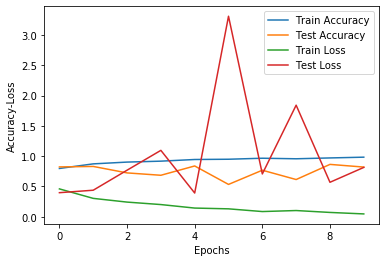

In [6]:
#sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-Loss')
plt.legend()

model.save('ICmodel2.h5')